### 1. 绘制 `sin` 正弦信号

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
x = np.linspace(start=0, stop=12 * np.pi, num=2000)
y = 0.5 * np.sin(3 * x + 0.8)

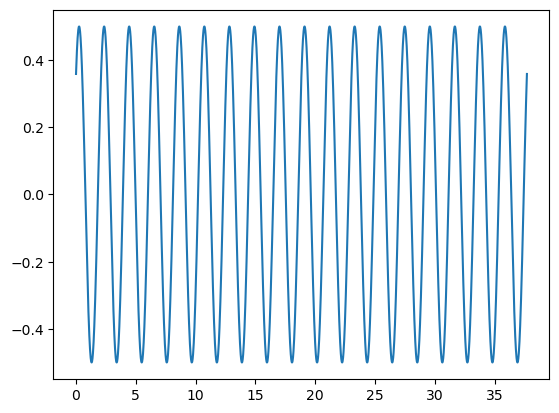

In [3]:
plt.plot(x, y)

In [4]:
# 建模思想：输入之前的连续y，输出 y

In [5]:
import torch
from torch import nn

In [6]:
class Model(nn.Module):
    """
        使用前SEQ_LEN个y，预测下一个y
    """
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=256)
        self.linear = nn.Linear(in_features=256, out_features=1)
    def forward(self, x):
        out, hn = self.gru(x)
        x = hn.squeeze(dim=0)
        x = self.linear(x)
        return x

In [7]:
# X = torch.tensor(data=x.reshape(-1, 1), dtype=torch.float32)
# Y = torch.tensor(data=y.reshape(-1, 1), dtype=torch.float32)

In [8]:
SEQ_LEN = 500

In [9]:
x.shape

(2000,)

In [10]:
X = []
Y = []
for idx in range(len(x)-SEQ_LEN-1):
    y_input = y[idx: idx + SEQ_LEN]
    y_output = y[idx + SEQ_LEN]
    X.append(y_input)
    Y.append(y_output)

In [11]:
X = np.array(X)
Y = np.array(Y).reshape(-1, 1)
X = torch.tensor(data=X, dtype=torch.float32).permute(dims=(1, 0)).unsqueeze(dim=-1).cuda()
Y = torch.tensor(data=Y, dtype=torch.float32).cuda()
X.shape,  Y.shape

(torch.Size([500, 1499, 1]), torch.Size([1499, 1]))

In [12]:
model = Model().cuda()
epocs = 1000
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-2)

In [13]:
def train():
    for epoch in range(epocs):
        y_pred = model(X)
        loss = loss_fn(y_pred, Y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % 500:
            print(loss.item())

In [15]:
train()

7.543121127717711e-10
7.495308818050717e-10
7.49907358432722e-10
7.423425207875312e-10
7.387742639863859e-10
7.356411590997425e-10
7.318390338184599e-10
7.367712551165084e-10
7.292128567648604e-10
7.332030538265144e-10
7.386820044530396e-10
7.330526186066777e-10
7.279906122370505e-10
7.255228084979137e-10
7.278296854096311e-10
7.198323048740463e-10
7.221681030955551e-10
7.286845571385925e-10
7.162446191699701e-10
7.127725076827574e-10
7.145584124401694e-10
7.09904413032092e-10
7.049483774501653e-10
7.051464412377584e-10
7.09531156051213e-10
7.089510645208463e-10
7.012973535225342e-10
6.995329315806487e-10
7.007228131072907e-10
7.059104967233054e-10
7.018338132880331e-10
7.001886292989923e-10
7.071807028857791e-10
6.933840168699135e-10
6.941986985253834e-10
6.968458587941484e-10
6.853336231849028e-10
6.895728987821315e-10
6.958749687591137e-10
6.83823109248749e-10
6.873221436443089e-10
6.810000341417322e-10
6.781614159123706e-10
6.760732529365043e-10
6.888664083604112e-10
6.729570789509

KeyboardInterrupt: 

In [22]:
def predict(y, n=1):
    """
        y：列表
        n: 连续预测后面的n步
    """
    results = []
    X = y
    for step in range(n):
        X_in = torch.tensor(data=[X], dtype=torch.float32).permute(dims=(1, 0)).unsqueeze(dim=-1)
        with torch.no_grad():
            y_pred = model(X_in.cuda()).cpu().item()
            results.append(y_pred)
            X.append(y_pred)
            X = X[1:]
    return results

In [23]:
# y_pred = predict(x)

In [24]:
x = np.linspace(start=-3 * np.pi, stop=6 * np.pi, num=1500)
y = 0.5 * np.sin(3 * x + 0.8)

In [25]:
# plt.plot(x, y)

In [26]:
y_pred = predict(y[222:222+SEQ_LEN].tolist(), n=2000)

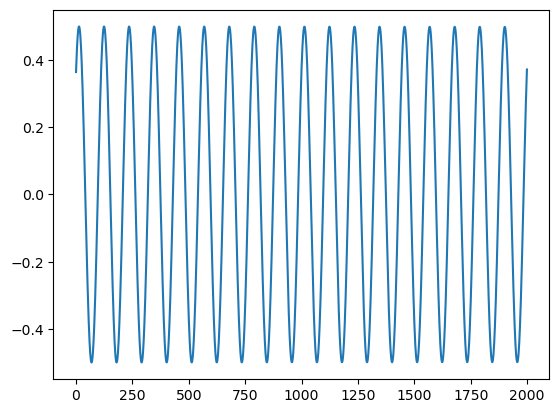

In [27]:
# plt.plot(x, y)
plt.plot(y_pred)